## Loading corpus

In [41]:
import nltk
from nltk.corpus import machado
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
import re

# Download the Machado corpus if not already downloaded
nltk.download('machado')
nltk.download('punkt')

[nltk_data] Downloading package machado to C:\Users\mhast/nltk_data...
[nltk_data]   Package machado is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\mhast/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
# Load the Machado corpus
machado_text = machado.raw()

# Tokenize the text into words
words = nltk.word_tokenize(machado_text, language='portuguese')

In [43]:
# Filter out punctuation and keep only alphabetic words, and convert them to lowercase
words = [word.lower() for word in words if word.isalpha() and len(word) > 1]

# Count the occurrences of each word
word_counts = Counter(words)

# Read the exceptions from the exceptions.txt file
with open('input/exceptions.txt', 'r', encoding='utf-8') as f:
    exceptions = set(line.strip().lower() for line in f)

# Filter words that appear more than once and are not in the exceptions list
common_words = [word for word, count in word_counts.items() if count > 100 and word not in exceptions]

# Sort the words alphabetically
common_words.sort()

# Save the words to a text file
with open('output/words.txt', 'w', encoding='utf-8') as f:
    for word in common_words:
        f.write(f"{word}\n")

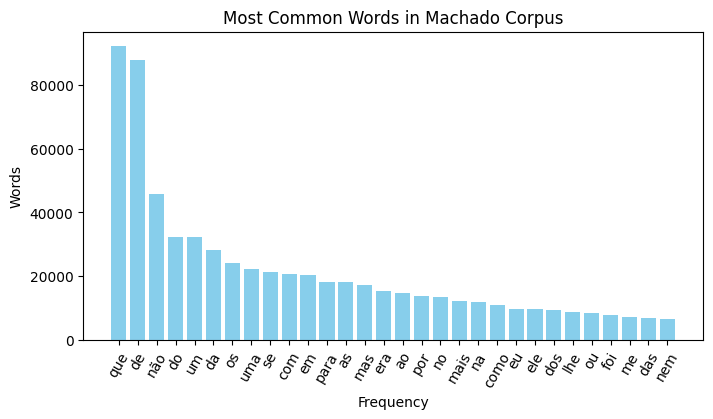

In [44]:
words, frequencies = zip(*word_counts.most_common(30))
plt.figure(figsize=(8, 4))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Words in Machado Corpus')
plt.xticks(rotation=60)
plt.show()